In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling import status # probando esta nueva librería
import sklearn
df = pd.read_csv("./036ei5wg8bzm6bfnggh2.csv")

df = df.drop(columns=["diagnostico1", "total"])
df_agrupado = df.groupby(['gru_edad', 'sexo', 'ano', 'nombre_enfermedad'], as_index=False)['n'].sum()
df = df_agrupado.sort_values(by=['gru_edad', 'sexo'])
df_agrupado = df_agrupado.sort_values(by='n', ascending=False)
df_10 = df_agrupado.groupby("nombre_enfermedad")["n"].sum().sort_values(ascending=False)
df_enfermedades_10 = pd.DataFrame(df_10.head(10)).reset_index()
df_enfermedades_10 = df_enfermedades_10.drop(columns="n")
df_merged = df.merge(df_enfermedades_10, on='nombre_enfermedad', how='inner')
df_10_sexo=pd.DataFrame(df_merged.groupby(['ano', 'nombre_enfermedad',"sexo"])["n"].sum().sort_values(ascending=False)).reset_index()
df_merged["Proporcion"]=(df_merged["n"]/len(df_merged["n"]))*100
df_pivote_1 = pd.pivot_table(df_merged, index='nombre_enfermedad', columns='ano', values="Proporcion", fill_value=0)
df_pivote_1['Promedio'] = df_pivote_1.iloc[:, :-1].mean(axis=1)
df_pivote_1['Desviacion_estandar'] = df_pivote_1.iloc[:, :-2].std(axis=1)
df_pivote_1['Total'] = df_pivote_1.iloc[:, 1:].sum(axis=1)
df_pivote_1  = df_pivote_1.sort_values(by = "Total",ascending=False)
estadisticos =df_pivote_1[["Promedio","Desviacion_estandar","Total"]]
df_pivote_1 = df_pivote_1.drop(columns=["Promedio","Desviacion_estandar","Total"])



ESTADISTICOS DESCRIPTIVOS DE LAS 10 ENFERMEDADES MAS MORTALES EN CHILE

El siguiente analisis contempla 39 enfemedades y causas de deseso en Chile desde 1997 al 2019, entren las cuales se contemplan diversos tumores y Lesiones autoinfligidas intencionalmente (Suicidio).

In [2]:
n_enfermedades =pd.DataFrame(df["nombre_enfermedad"].unique())
n_enfermedades.sort_values(by=0, ascending=True)

,0
8,"Anemias: nutricionales, hemolíticas, aplástica..."
23,Aneurisma aórtico
38,Aterosclerosis
0,Ciertas enfermedades crónicas del hígado y cir...
9,Deficiencias nutricionales
18,Diabetes Mellitus no especificada
16,Diabetes insulinodependiente
34,Diabetes no insulinodependiente
1,Enfermedad Pulmonar Obstructiva Crónica (EPOC)
2,Enfermedad cardiopulmonar y de la circulación ...


In [3]:
print("Proporciones de casos de las 10 enfermedades más mortales en Chile según Año")
df_pivote_1

Proporciones de casos de las 10 enfermedades más mortales en Chile según Año


ano,1997,1998,1999,2000,2001,2002,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
nombre_enfermedad,,,,,,,,,,,,,,,,,,,,,
Enfermedades isquémicas del corazón,4.278478,4.744217,4.735288,4.254093,4.329465,4.488681,4.415367,4.404837,4.402066,4.514090,...,4.316718,3.988073,4.395416,4.290116,4.490185,4.495339,4.368906,4.601581,4.296582,4.351763
Enfermedades cerebrovasculares,3.107700,3.471093,3.608853,3.630811,3.341637,3.373781,3.474678,3.534922,3.396550,3.695668,...,4.328726,4.254697,4.133260,4.134637,4.189922,3.785849,4.237484,3.701918,3.912315,3.682785
Enfermedad hipertensiva,1.138434,1.210758,1.477955,1.474767,1.695596,1.533640,1.797768,1.881615,1.851257,2.087506,...,2.366751,2.002112,2.420325,2.940534,3.145679,3.346421,3.953713,3.880770,3.763321,3.414408
Ciertas enfermedades crónicas del hígado y cirrosis,1.980300,1.932658,1.708620,1.658527,1.783992,1.987571,2.009519,1.933074,1.901854,2.000964,...,2.141862,1.963895,2.036997,2.200756,2.220153,2.193051,2.600574,2.265598,2.004179,1.805249
Tumor maligno del estómago,1.709946,1.659434,1.743812,1.798874,1.624935,1.801786,1.691440,1.774808,1.784566,1.827446,...,1.837750,1.926855,1.996500,1.735776,1.809486,1.934380,1.934593,1.963165,1.816710,1.636666
Enfermedad Pulmonar Obstructiva Crónica (EPOC),0.583580,0.868424,0.994321,0.913961,1.313737,1.019065,1.264666,1.413228,1.409744,1.535948,...,1.872388,1.679846,1.765539,1.512431,1.591128,1.953070,1.844423,1.961402,2.122174,1.860025
"Tumor maligno de la tráquea, bronquios y pulmón",1.058371,1.069681,1.184828,1.086582,1.191709,1.177274,1.322666,1.318478,1.383914,1.348441,...,1.719061,1.540695,1.634752,1.875479,1.818517,1.783418,1.885186,1.815582,1.968523,2.165220
Trastornos mentales y del comportamiento,0.942891,0.558663,0.301659,0.690578,1.222581,1.300795,1.392907,1.332421,1.292411,1.494161,...,1.597928,1.702102,1.423204,1.184736,0.983071,0.921092,0.994247,1.000093,1.348262,1.266577
Tumor maligno de la vesícula biliar y de las vías biliares,1.099968,1.055189,1.137898,1.138640,1.160533,1.207329,1.145612,1.125040,1.263399,1.331181,...,1.172587,1.179042,1.117622,1.204701,1.143121,1.067181,1.170334,1.083812,1.210990,1.075427


In [4]:
estadisticos

ano,Promedio,Desviacion_estandar,Total
nombre_enfermedad,,,
Enfermedades isquémicas del corazón,4.393120,0.183880,96.905797
Enfermedades cerebrovasculares,3.745692,0.349808,83.330121
Enfermedad hipertensiva,2.285529,0.876975,53.434583
Ciertas enfermedades crónicas del hígado y cirrosis,2.025714,0.206647,44.597311
Tumor maligno del estómago,1.823308,0.109529,40.149015
Enfermedad Pulmonar Obstructiva Crónica (EPOC),1.457161,0.406979,33.740972
"Tumor maligno de la tráquea, bronquios y pulmón",1.467170,0.304575,33.689164
Trastornos mentales y del comportamiento,1.168505,0.351899,26.382685
Tumor maligno de la vesícula biliar y de las vías biliares,1.163955,0.065781,25.648255


En 22 años las Enfermedades isquémicas del corazón representan un 97% en la suma acumulativa 

ESTADISTICOS EXPLORATORIOS y DESCRIPTIVOS DE LAS 10 ENFERMEDADES MAS MORTALES EN CHILE

10 Enfermedades con mayor mortalidad por Sexo desde 1997 al 2019

c:\Users\Usuario\miniconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Usuario\miniconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14512\4255995730.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 0.9, 0.9])


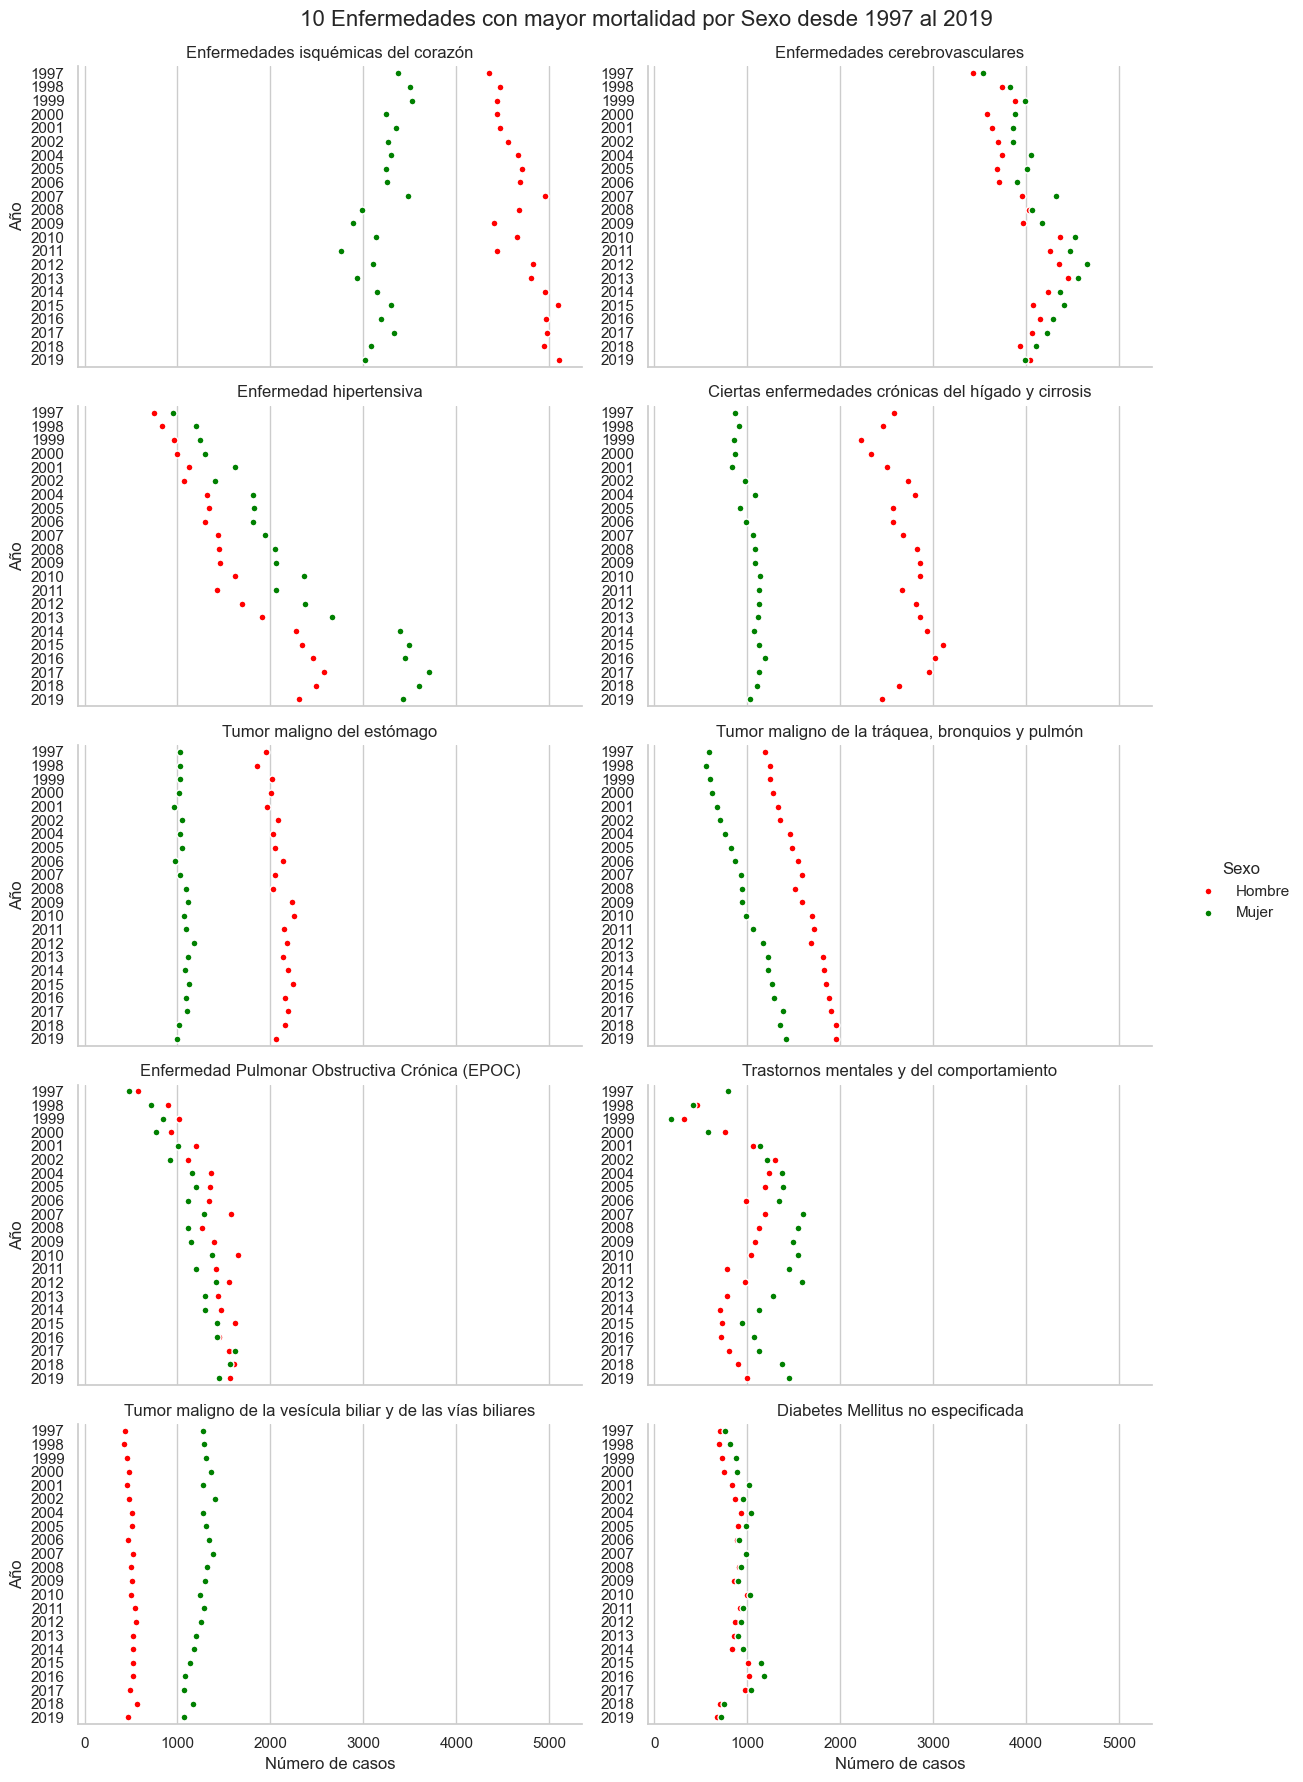

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df_10_sexo, col="nombre_enfermedad", hue="sexo", col_wrap=2, height=4, aspect=1.5, sharey=False, palette={"Hombre": "red", "Mujer": "green"})
g.map(sns.stripplot, "n", "ano", size=5, orient="h", jitter=True, linewidth=1, edgecolor="w")
g.set_axis_labels("Número de casos", "Año")

for ax in g.axes.flat:
    ax.set_title(ax.get_title().split(" = ")[-1])

g.add_legend(title="Sexo", loc='center right')
plt.suptitle("10 Enfermedades con mayor mortalidad por Sexo desde 1997 al 2019", x=0.5, y=0.89, fontsize=16, ha='center')
plt.tight_layout(rect=[0, 0, 0.9, 0.9])
plt.show()

10 Enfermedades con mayor mortalidad por Grupo Etario desde 1997 al 2019

In [6]:
#Recategorizacion de Rangos de edad para un mejor analisis

def agrupar_edades(rango):
    if rango in ['00-04', '05-09','10-14']:
        return '0 - 14'
    elif rango in ['15-19','20-24', '25-29']:
        return '15 - 29'
    elif rango in ['30-34', '35-39','40-44']:
        return '30 - 44'
    elif rango in [ '45-49','50-54', '55-59']:
        return '45 - 59'
    elif rango in ['60-64', '65-69','70-74']:
        return '60 - 74'
    elif rango in ['75-79','80-84', '85 +']:
        return '75 - 85 +'
    else:
        return 'Rango no válido'

df_merged['grupo_edad'] = df_merged['gru_edad'].apply(agrupar_edades)
df_merged

,gru_edad,sexo,ano,nombre_enfermedad,n,Proporcion,grupo_edad
0,00-04,Hombre,1997,Ciertas enfermedades crónicas del hígado y cir...,1,0.016072,0 - 14
1,00-04,Hombre,1997,Enfermedad Pulmonar Obstructiva Crónica (EPOC),3,0.048216,0 - 14
2,00-04,Hombre,1997,Enfermedad hipertensiva,1,0.016072,0 - 14
3,00-04,Hombre,1997,Enfermedades cerebrovasculares,1,0.016072,0 - 14
4,00-04,Hombre,1998,Enfermedad Pulmonar Obstructiva Crónica (EPOC),3,0.048216,0 - 14
...,...,...,...,...,...,...,...
6217,85 +,Mujer,2019,Enfermedades isquémicas del corazón,1144,18.386371,75 - 85 +
6218,85 +,Mujer,2019,Trastornos mentales y del comportamiento,1022,16.425587,75 - 85 +
6219,85 +,Mujer,2019,"Tumor maligno de la tráquea, bronquios y pulmón",221,3.551913,75 - 85 +
6220,85 +,Mujer,2019,Tumor maligno de la vesícula biliar y de las v...,156,2.507232,75 - 85 +


In [1]:
df_merged.show()

NameError: name 'df_merged' is not defined

In [7]:
df_10_edad=pd.DataFrame(df_merged.groupby(['ano', 'nombre_enfermedad',"grupo_edad"])["n"].sum().sort_values(ascending=False)).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Crear un FacetGrid para las enfermedades
g = sns.FacetGrid(df_10_edad, col="nombre_enfermedad", hue="grupo_edad", col_wrap=2, height=4, aspect=1.5, sharey=False, palette = {
    '0 - 14': '#FF5733',  # Rojo
    '15 - 29': '#FFBD33',  # Amarillo
    '30 - 44': '#00FF66',  # Verde lima
    '45 - 59': '#33CCFF',  # Azul cielo
    '60 - 74': '#FF33FF',  # Rosa claro
    '75 - 85 +': '#FFA833',  # Naranja
})

# Dibujar un gráfico de puntos usando la función stripplot
g.map(sns.stripplot, "n", "ano", size=5, orient="h", jitter=True, linewidth=1, edgecolor="w", order=sorted(df_10_edad['n'].unique()))

# Establecer etiquetas de los ejes
g.set_axis_labels("Número de casos", "Año")

# Ajustar los títulos para cada subgráfico
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split(" = ")[-1])

# Añadir una leyenda para el tono
g.add_legend(title="Rango Etario", loc='center right')

# Añadir un título general
plt.suptitle("10 Enfermedades con mayor mortalidad por Rango Etario desde 1997 al 2019", x=0.5, y=0.98, fontsize=16, ha='center')

# Ajustar el diseño para que sea prolijo
plt.tight_layout(rect=[0, 0, 0.9, 0.93])
plt.show()

c:\Users\Usuario\miniconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

In [ ]:
df_merged["Proporcion N"] =(df_merged["n"]/len(df_merged["n"]))*100
df_pivote = pd.pivot_table(df_merged, index='nombre_enfermedad', columns='grupo_edad', values="Proporcion N", fill_value=0)
df_pivote['Total'] = df_pivote.iloc[:, 1:].sum(axis=1)
df_pivote  = df_pivote.sort_values(by = "Total",ascending=False)
print("Proporciones de enfermedades según Rango Etario")
df_pivote

Proporciones de enfermedades según Rango Etario


grupo_edad,0 - 14,15 - 29,30 - 44,45 - 59,60 - 74,75 - 85 +,Total
nombre_enfermedad,,,,,,,
Enfermedades cerebrovasculares,0.035449,0.106247,0.517957,2.063061,5.791035,13.161387,21.639686
Enfermedades isquémicas del corazón,0.022501,0.068924,0.487396,2.772542,6.911326,10.953800,21.193989
Enfermedad hipertensiva,0.016072,0.025030,0.095628,0.488857,1.956036,7.789564,10.355115
Ciertas enfermedades crónicas del hígado y cirrosis,0.019381,0.061723,0.880794,3.312050,4.001563,1.750509,10.006640
Tumor maligno del estómago,0.016072,0.040371,0.279068,1.302563,3.347360,3.487016,8.456378
"Tumor maligno de la tráquea, bronquios y pulmón",0.017411,0.027718,0.117697,1.087782,3.195163,2.453781,6.882141
Enfermedad Pulmonar Obstructiva Crónica (EPOC),0.035716,0.020090,0.034066,0.255680,1.565681,4.844004,6.719521
Trastornos mentales y del comportamiento,0.017603,0.039496,0.170663,0.320953,0.642150,4.440621,5.613883
Diabetes Mellitus no especificada,0.016072,0.024789,0.074383,0.510043,1.746004,2.480202,4.835421


Entrenamiento Modelo Random Forest para prediccíon de Mortalidad en Chile

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor

RANDOM FOREST SIN GRIDSEARCHCV

In [ ]:
df_modelo = df_merged[["grupo_edad", "sexo", "ano", "nombre_enfermedad", "n"]]
#df_modelo["ano"] = df_modelo["ano"].astype(object)

X = df_modelo [['grupo_edad', 'sexo', 'ano', 'nombre_enfermedad']]
y = df_modelo ['n']

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=5000, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
score = model.score(X_test, y_test)
print(f'R^2 Score: {score}')

R^2 Score: 0.6402421290368685


Con Año como variable numero 
R^2 Score: 0.6402421290368685

Con Año como variable objeto
R^2 Score: 0.6369820155665356

RANDOM FOREST CON GRIDSEARCHCV

HYPERTUNING

In [ ]:
rf_model = RandomForestRegressor()

#se definien los parametros 
param = {
    'n_estimators': [ 500, 1000, 5000],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

#se configura la modalidad del corss validation
grid_search = GridSearchCV(estimator= rf_model, 
                        param_grid=param,
                        scoring= "neg_mean_absolute_error",
                        cv= 3 , 
                        n_jobs=- 1 , 
                        verbose= 2
                        )

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [500, 1000, 5000]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=500)

In [ ]:
grid_search.best_params_

{'n_estimators': 500}

In [ ]:
grid_search.predict(X_train)
grid_search.predict(X_test)

array([ 14.91443766,  81.24266667,  61.95514286, ..., 163.48015714,
        70.38013333, 156.27449524])

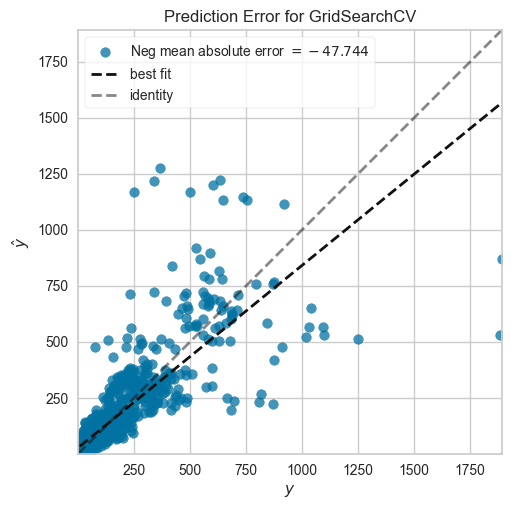

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_search)
vis_pred_err.score(X_test,y_test)
vis_pred_err.show()

Guardar Modelo con Pickle

import pickle
#para guardar el modelo
file_name ="model.pkl"
pickle.dump(grid_search,open(file_name,"wb") )

with open ("categories_ohe.pickle","wb") as handle:
    pickle.dump(X.columns,handle,protocol=pickle.HIGHEST_PROTOCOL)

import pickle
#para guardar el modelo
file_name ="model.pkl"
pickle.dump(grid_search,open(file_name,"wb") )

with open ("categories_ohe.pickle","wb") as handle:
    pickle.dump(X.columns,handle,protocol=pickle.HIGHEST_PROTOCOL)